Day 38 : 21/03/15
- https://www.kaggle.com/c/mercari-price-suggestion-challenge
- https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling

# Mercari Interactive EDA + Topic Modeling

이것은 matplotlib을 사용한 Mercari Price Suggestion Challenge에 대한 초기 EDA다. bokeh와 Plot.ly는 예쁜 대화형 플롯과 대시보드를 만드는 시각화 도구다. 이 대회는 Mercari가 개최했고, Mercari는 상품 정보가 주어지면, 판매자에게 제시해야하는 정확한 가격을 예측하는 것을 주요 목표로 하는 일본 최대 커뮤니티 기반 쇼핑 앱이다.

클러스터링 주제에 대한 문서와 기계학습 기술(K-means와 LDA)의 전처리에 대한 지침을 통해 커널을 두 파트로 나눈다.
1. EDA (Explanatory Data Analysis)
2. Text Processing
- 2.1. Tokenizing and tf-idf algorithm
- 2.2. K-means Clustering
- 2.3. Latent Dirichlet Allocation(LDA) / Topic Modelling

In [1]:
### Latent Dirichlet Allocation (LDA)
### 토픽 모델링의 대표적 알고리즘
### LDA는 문서들은 토픽들의 혼합으로 구성되어 있으며, 토픽들은 확률 분포에 기반해 단어들을 생성한다고 가정. 
### 데이터가 주어지면, LDA는 문서가 생성되던 과정을 역추적.

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv('../input/train.tsv', sep='\t')
test = pd.read_csv('../input/test.tsv', sep='\t')

In [6]:
print(train.shape)
print(test.shape)

(1482535, 8)
(693359, 7)


In [7]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [8]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


## Target Variable : Price

다음 표준 점검은 목표 변수(대응 변수)이고, 이 경우 Mercari의 시장 판매자에게 제안할 가격이다. training에서 모든 상품의 가격 중간값은 약 $267지만, $100 이상과 최대값 $2,009인 일부 극단값의 존재가 주어져, 변수의 분포는 왼쪽으로 크게 치우쳐져있다. 따라서 가격에 로그 변환을 한다(0과 음수 피하기 위해 변환 전 값에 +1 추가)

In [9]:
train.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [13]:
log_price = train['price'].apply(lambda x: np.log(x+1))

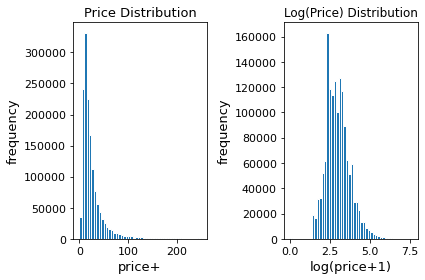

In [59]:
#plt.subplots(1,2, figsize=(20,10))
plt.subplot(1,2,1)
plt.hist(train['price'], bins=50, edgecolor='white', range=[0,250])
plt.xlabel('price+', fontsize=13)
plt.ylabel('frequency', fontsize=13)
plt.tick_params(labelsize=11)
plt.title('Price Distribution', fontsize=13)

plt.subplot(1,2,2)
plt.hist(np.log(train['price']+1), bins=50, edgecolor='white')
plt.xlabel('log(price+1)', fontsize=13)
plt.ylabel('frequency', fontsize=13)
plt.tick_params(labelsize=11)
plt.title('Log(Price) Distribution')

plt.tight_layout()
plt.show()